### Logistic Regression
- 사건 발생 가능성을 예측. classification 기법으로도 활용됨


### SVM
- 데이터 차원을 커널함수를 사용하여 차원을 높임.  
- 데이터를 구분하는 직선을 그리는데, 서포트 벡터들의 거리를 최대화 하는 선


### 나이브 베이즈 분류기
- 조건부 확률


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, svm

# 데이터를 학습과 추정을 위한 셋트로 분리하는 라이브러리를 호출해 봅시다.
from sklearn.model_selection import train_test_split

# 모델을 평가하고 확인하는 라이브러리를 호출해 봅시다.
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import SelfTrainingClassifier

from sklearn.inspection import DecisionBoundaryDisplay

## SVM

[[13  0  0]
 [ 0 13  0]
 [ 0  0 12]]


<Axes: >

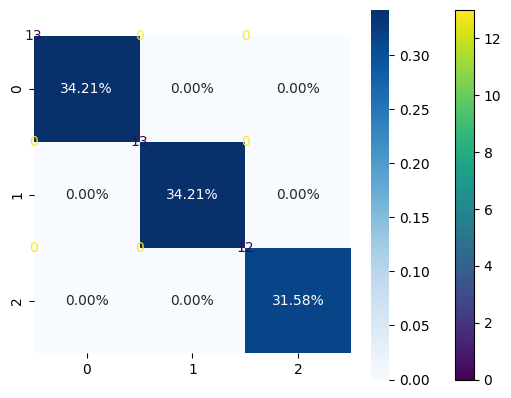

In [2]:
# Data load
iris = datasets.load_iris()

X = iris.data           # 모든 피쳐의 데이터를 선택해 봅시다
y = iris.target         # 지도학습을 위한 target을 결정해 봅시다

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0, stratify=y)

# Model building
clf = svm.SVC(kernel="linear")      #가장 기본 SVM을 만들어봅시다 (linear) SVC:support vector classifier
    #     svm.SVC(kernel="linear", C=C),
    #     svm.SVC(kernel="rbf", C=C),
    #     svm.SVC(kernel="poly", degree=3, C=C),
clf.fit(X_train, y_train)           #학습 데이터 세트를 사용하여 모델을 학습시켜봅시다 - 데이터 분석
predictions = clf.predict(X_test)    #평가 데이터 세트를 사용하여 모델의 성능을 확인하여 봅시다
accuracy_score(y_test, predictions)       #모델의 정확도를 '라이브러리로' 확인해 봅시다

# Display
#모델의 성능을 confusion matrix로 확인하여 봅시다
cm = confusion_matrix(y_test, predictions)  
print(cm)
# ConfusionMatrixDisplay를 사용하여 시각적 표현 성능을 올려봅시다
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 1","Class 2","Class 3"])
disp.plot()
# seaborn 라이브러리로 표현해 봅시다
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

## Logistic Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# 데이터를 학습과 추정을 위한 셋트로 분리하는 라이브러리를 호출해 봅시다.
from sklearn.model_selection import train_test_split

# 모델을 평가하고 확인하는 라이브러리를 호출해 봅시다.
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import SelfTrainingClassifier

from sklearn.inspection import DecisionBoundaryDisplay

[[13  0  0]
 [ 0 13  0]
 [ 0  0 12]]


C:\Users\donghuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

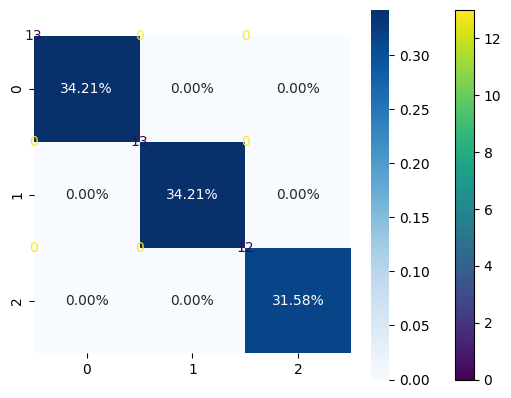

In [7]:
iris = datasets.load_iris()                 # 데이터셋에서 iris를 호출해 봅시다.
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0, stratify=y)

# Model building
clf = LogisticRegression()
    #     LogisticRegression(penalty='l2', solver='lbfgs'),
    #     LogisticRegression(penalty='l2', solver='newton-cholesky'),
    #     LogisticRegression(penalty='l2', solver='saga'),
    #     LogisticRegression(penalty='l1', solver='saga'),
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

# Display
#모델의 성능을 confusion matrix로 확인하여 봅시다
cm = confusion_matrix(y_test, predictions)
print(cm)
# ConfusionMatrixDisplay를 사용하여 시각적 표현 성능을 올려봅시다
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 1","Class 2","Class 3"])
disp.plot()
#갯수 대신 확률로 표현해 봅시다
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

## Naive Bayesian Classifier

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.naive_bayes import CategoricalNB, GaussianNB, ComplementNB, MultinomialNB

# 데이터를 학습과 추정을 위한 셋트로 분리하는 라이브러리를 호출해 봅시다.
from sklearn.model_selection import train_test_split

# 모델을 평가하고 확인하는 라이브러리를 호출해 봅시다.
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import SelfTrainingClassifier

from sklearn.inspection import DecisionBoundaryDisplay

<Axes: >

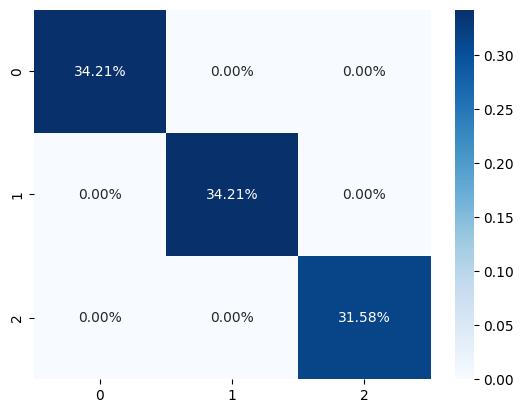

In [9]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0, stratify=y)

clf = CategoricalNB()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')